In [ ]:
## Imports
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy as sp
import seaborn as sns
from scipy.spatial import distance
import pandas as pd
from matplotlib.collections import LineCollection
import matplotlib.cm
from sklearn.datasets import fetch_lfw_people
import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances
from matplotlib import offsetbox
from sklearn import manifold
import warnings
warnings.filterwarnings('ignore')

## MDS

In [ ]:
## Read file as DF
#Upload file in your googlecolab
df= pd.read_excel('/content/distances.xlsx')
print('Head of our DataFrame',df.head())

Head of our DataFrame      Unnamed: 0  Ahvaz  Arak  Ardabil  Bandar Abbas  Birjand  Bojnord  \
0         Ahvaz      0   507     1202          1126     1352     1466   
1          Arak    507     0      732          1269     1152      963   
2       Ardabil   1202   732        0          1813     1592     1060   
3  Bandar Abbas   1126  1269     1813             0     1043     1487   
4       Birjand   1352  1152     1592          1043        0      762   

   Bushehr  Gorgan  Hamadan  ...  Semnan  Shahr-e Kord  Shiraz  Tabriz  \
0      446    1159      557  ...     920           464     520    1150   
1      946     655      189  ...     417           285     754     748   
2     1476     752      563  ...     792           980    1357     217   
3      741    1659     1419  ...    1407           967     579    1808   
4     1343     934     1303  ...     914           955    1060    1747   

   Tehran  Urmia  Yasuj  Yazd  Zahedan  Zanjan  
0     780   1050    416   805     1581     86

In [ ]:
df.head()

,Unnamed: 0,Ahvaz,Arak,Ardabil,Bandar Abbas,Birjand,Bojnord,Bushehr,Gorgan,Hamadan,...,Semnan,Shahr-e Kord,Shiraz,Tabriz,Tehran,Urmia,Yasuj,Yazd,Zahedan,Zanjan
0,Ahvaz,0,507,1202,1126,1352,1466,446,1159,557,...,920,464,520,1150,780,1050,416,805,1581,862
1,Arak,507,0,732,1269,1152,963,946,655,189,...,417,285,754,748,276,716,558,616,1467,460
2,Ardabil,1202,732,0,1813,1592,1060,1476,752,563,...,792,980,1357,217,573,357,1191,1160,2011,262
3,Bandar Abbas,1126,1269,1813,0,1043,1487,741,1659,1419,...,1407,967,579,1808,1280,1949,751,659,719,1520
4,Birjand,1352,1152,1592,1043,0,762,1343,934,1303,...,914,955,1060,1747,1136,1888,1002,630,450,1459


In [ ]:
## Name of Cities
labels=df['Unnamed: 0']

In [ ]:
## Distances of Cities
dist=pd.read_excel('/content/distances.xlsx',index_col=0)

In [ ]:
def MDS(D):
    A=np.power(D, 2)
  # D is distances
    n = len(D)
  # I diaf and zeros
    I = np.identity(n)
    e=np.ones(n)
    eeT=np.outer(e,e.T)
    L=I-(1/n)*eeT
    B = (-1/2) *(L@A@L)
    ev, q = np.linalg.eigh(B)
    x = ev.argsort()[::-1]
    evalues = ev[x]
    Q= q[:,x]
    l=np.array([np.sqrt(max(evalues[0],0)),np.sqrt(max(evalues[1],0))])
    X =  Q[:,:2].dot(np.diag(l))
    return X

In [ ]:
## Distance Matrix Using MDS algorithm
A=dist.to_numpy()
X=MDS(A)

In [ ]:
## Plotting MDS
def ploting(Y,labels):
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)
    cmap= matplotlib.cm.coolwarm(np.linspace(0, 1, len(Y)))
    ax.scatter(Y[:,0], Y[:,1])
    p=0
    for label, x, y in zip(labels, Y[:, 0], Y[:, 1]):
        plt.annotate(label,xy = (x, y), xytext = (-15, 15),textcoords = 'offset points', ha = 'right', va = 'bottom',bbox = dict(boxstyle = 'round,pad=0.4', fc = cmap[p]),fontsize=15)
        p=p+1
    plt.show
    return

Text(0.5, 1.0, 'My MDS Result')

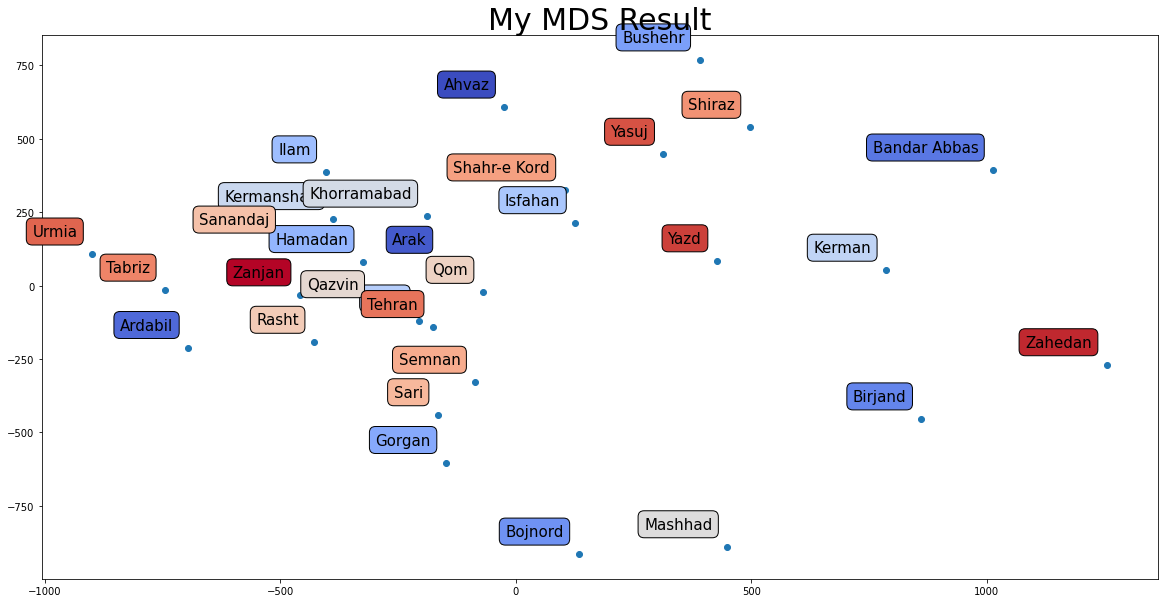

In [ ]:
## My Map
ploting(X, labels)
plt.title('My MDS Result',fontsize=30)

In [ ]:
## Sklearn MDS
mm=manifold.MDS()
mds=mm.fit_transform(A)

Text(0.5, 1.0, 'Sklearn MDS Result')

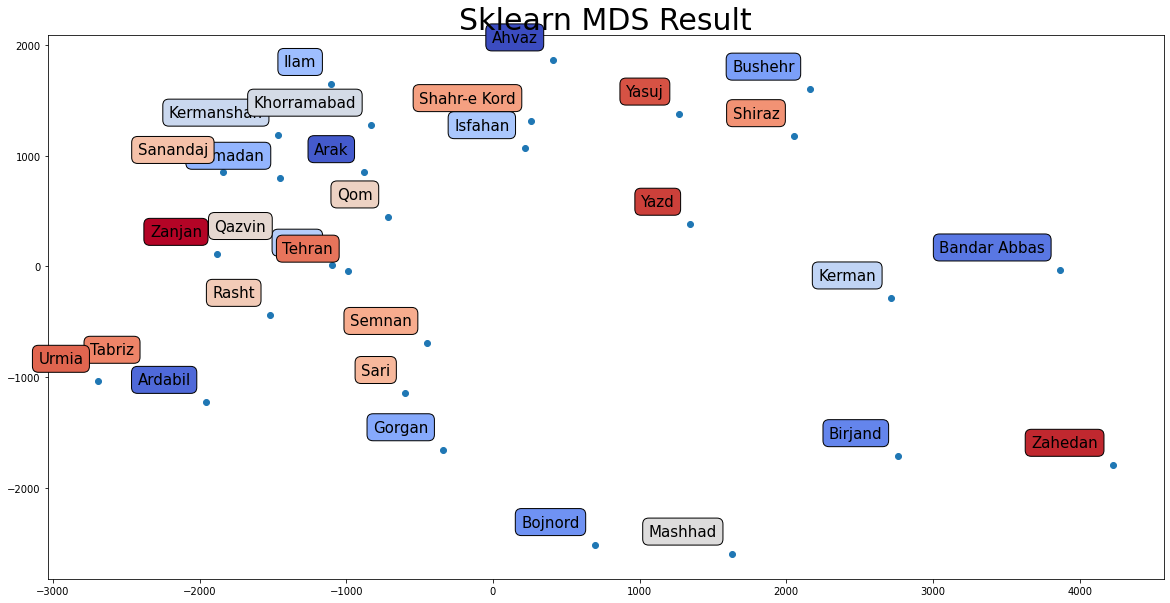

In [ ]:
ploting(mds, labels)
plt.title('Sklearn MDS Result',fontsize=30)

# Isomap

In [ ]:
def isomap(data):
    A=euclidean_distances(data)
  ## Generate Graph
    n = np.shape(A)[0]
    Graph = nx.DiGraph()
    for i in range(n):
        for j in range(n):
            Graph.add_weighted_edges_from([(i,j,min(A[i,j], A[j,i]))])
  ## Shortest path
    dij= dict(nx.all_pairs_dijkstra_path_length(Graph))
    D = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            D[i,j] = dij[i][j]
    Z=MDS(D)
    return Z,D


In [ ]:
## images data
faces=fetch_lfw_people(min_faces_per_person=50)
images = faces.images[faces.target==4]
images_transpose = images.transpose()
data = faces.data[faces.target==4]

In [ ]:
## My isomap of images
Z,D=isomap(data)

In [ ]:
iso=manifold.Isomap()
w=iso.fit_transform(data)

In [ ]:
## Plot isomap images
def plotisomap(images,Z,D):
  fig = plt.figure()
  fig.set_size_inches(10, 10)
  ax =  plt.gca()
  ax.scatter(Z[:,0], Z[:,1], marker='.',alpha=0.7)
  if images is not None:
    img = np.array([ Z.max(0)])
    for i in range(D.shape[0]):
        shown_images = np.vstack([img, Z[i]])
        imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(images[i], cmap='gray'),Z[i])
        ax.add_artist(imagebox)
        plt.show
    return

Text(0.5, 1.0, 'My isomap Result')

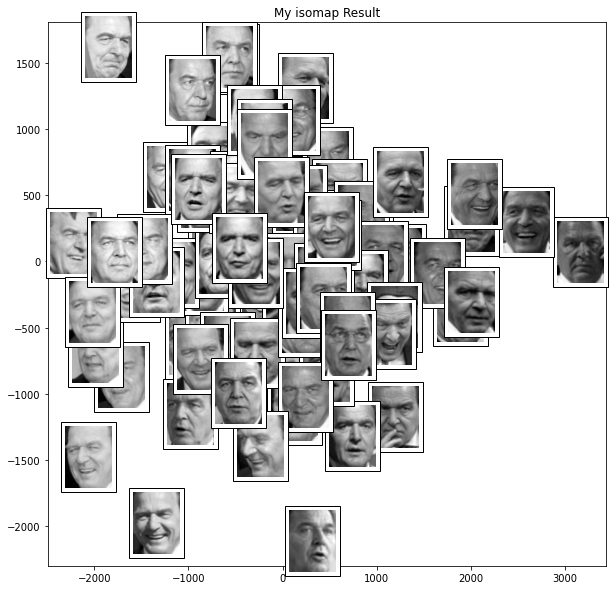

In [ ]:
plotisomap(images,Z,D)
plt.title('My isomap Result')

Text(0.5, 1.0, 'Sklearn Result')

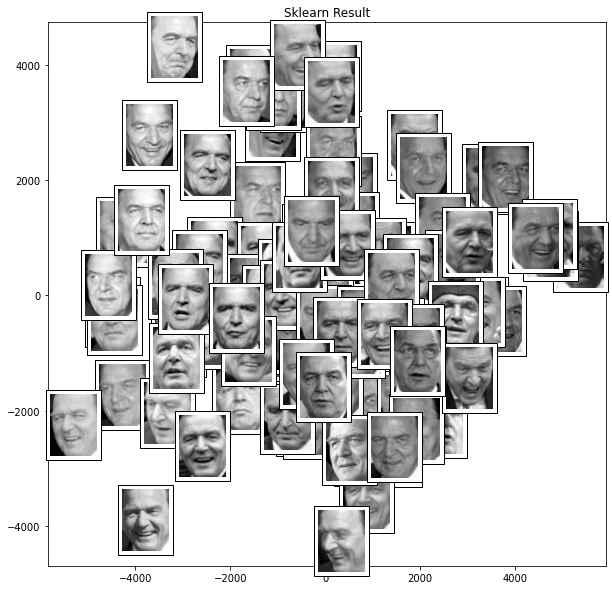

In [ ]:
plotisomap(images,w,D)
plt.title('Sklearn Result')